In [1]:
import random
import statistics as std
import matplotlib.pyplot as plt

In [2]:
def createPreference(N):
  prefer = []
  for i in range(1, 2*N+1):
    preference = []
    while (len(preference) < N):
      k = random.randint(1, N)
      if k in preference:
        continue
      preference.append(k)
    prefer.append(preference)
  return prefer

In [3]:
# This function returns true if 
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, w, m, m1, N): 
	
  for i in range(N):
	  if (prefer[w][i] == m1): 
	    return True

		# If m cmes before m1 in w's list, 
		# then free her current engagement 
		# and engage her with m 
	  if (prefer[w][i] == m): 
		  return False

# Prints stable matching for N boys and N girls. 
# Boys are numbered as 0 to N-1. 
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer, N):
  wPartner = [-1 for i in range(N)]
  count = 0

	# An array to store availability of men. 
	# If mFree[i] is false, then man 'i' is free, 
	# otherwise engaged. 
  mFree = [False for i in range(N)] 

  freeCount = N 

	# While there are free men 
  while (freeCount > 0): 
		
		# Pick the first free man (we could pick any) 
    m = 0
    while (m < N): 
      if (mFree[m] == False): 
        break
      m += 1

		# One by one go to all women according to 
		# m's preferences. Here m is the picked free man 
    i = 0
    while i < N and mFree[m] == False:
      w = prefer[m][i] 

			# The woman of preference is free, 
			# w and m become partners (Note that 
			# the partnership maybe changed later). 
			# So we can say they are engaged not married 
      if (wPartner[w - N] == -1): 
        wPartner[w - N] = m 
        mFree[m] = True
        freeCount -= 1
        count += 1

      else: 
				
				# If w is not free 
				# Find current engagement of w 
        m1 = wPartner[w - N] 

        count += 1
				# If w prefers m over her current engagement m1, 
				# then break the engagement between w and m1 and 
				# engage m with w. 
        if (wPrefersM1OverM(prefer, w, m, m1, N) == False):
          wPartner[w - N] = m 
          mFree[m] = True
          mFree[m1] = False
      i += 1

			# End of Else 
		# End of the for loop that goes 
		# to all women in m's list 
	# End of main while loop 

	# Prthe solution 
  #print("Woman ", " Man") 
  #for i in range(N): 
   # print(i + N, "\t", wPartner[i])
  return count

for $n=4$

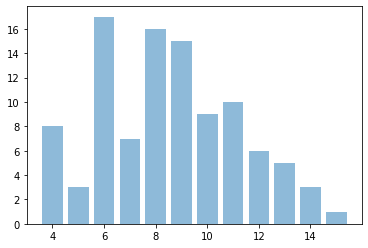

max 15
min 4
mean 9.5


In [4]:
N = 4
count = []
for i in range(100):
  prefer = createPreference(N)
  count.append(stableMarriage(prefer, N))

contador = []
for i in range(N, N**2 + 1):
  contador.append(count.count(i))

k = len(contador) - 1
while k >= 0:
  if contador[k] == 0:
    contador.pop(k)
  k -= 1

count = list(set(count))

chart = plt.bar(count,contador,align='center',alpha=0.5)
plt.show()
print('max', max(count))
print('min', min(count))
print('mean', std.mean(count))


for $n = 40$

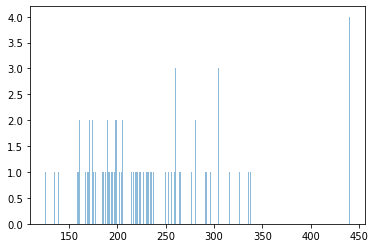

max 440
min 126
mean 230.14473684210526


In [5]:
N = 40
count = []
for i in range(100):
  prefer = createPreference(N)
  count.append(stableMarriage(prefer, N))

contador = []
for i in range(N, N**2 + 1):
  contador.append(count.count(i))

k = len(contador) - 1
while k >= 0:
  if contador[k] == 0:
    contador.pop(k)
  k -= 1
  
count = list(set(count))

chart = plt.bar(count,contador,align='center',alpha=0.5)
plt.show()
print('max', max(count))
print('min', min(count))
print('mean', std.mean(count))